In [1]:
from LinearModel import MSELoss, Linear
from NonLinearModel import Tanh, Sigmoid
import numpy as np
import matplotlib.pyplot as plt


In [4]:
batch = 64
input = 100
output1 = 50
output2 = 1
epochs = 100

In [9]:
mse_scores = []

X = np.random.randn(batch, input)
y = np.random.randint(0, 2, (batch, output2))

first_layer = Linear(input, output1)
second_layer = Linear(output1, output2)

tanh = Tanh()
sigmoid = Sigmoid()

mse = MSELoss()

###### initialisation #######

first_layer_output = first_layer.forward(X)
first_layer_output_after_activation = tanh.forward(first_layer_output)

second_layer_output = second_layer.forward(first_layer_output_after_activation)
y_hat = sigmoid.forward(second_layer_output)

mse_scores.append(mse.forward(y, y_hat).mean())

delta_mse = mse.backward(y, y_hat)

###### learning ########

for i in range(epochs):
    ######## backward propagation ########
    grad_sigmoid = sigmoid.backward_delta(second_layer_output, delta_mse)
    grad_second_layer = second_layer.backward_delta(first_layer_output_after_activation, grad_sigmoid)
    grad_tanh = tanh.backward_delta(first_layer_output, grad_second_layer)
    
    ######## update gradient and parameters #########
    
    second_layer.backward_update_gradient(first_layer_output_after_activation, grad_sigmoid)
    second_layer.update_parameters()
    second_layer.zero_grad()
    
    first_layer.backward_update_gradient(X, grad_tanh)
    first_layer.update_parameters()
    first_layer.zero_grad()
    
    ######## update mse ########
    first_layer_output = first_layer.forward(X)
    first_layer_output_after_activation = tanh.forward(first_layer_output)
    
    second_layer_output = second_layer.forward(first_layer_output_after_activation)
    y_hat = sigmoid.forward(second_layer_output)
    
    mse_scores.append(mse.forward(y, y_hat).mean())
    
    delta_mse = mse.backward(y, y_hat)

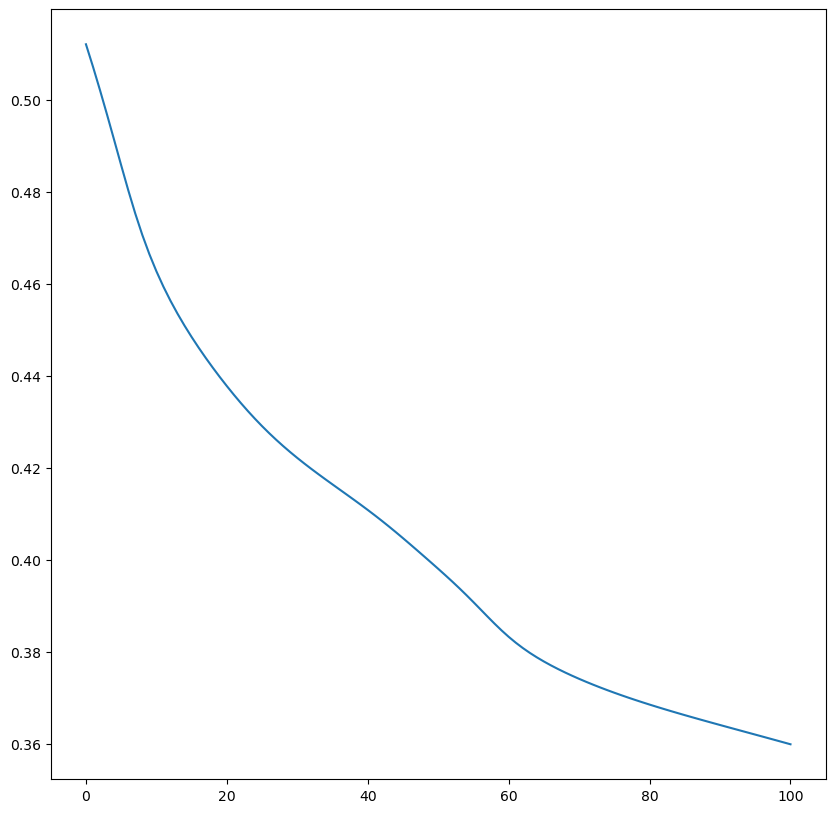

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(epochs+1), mse_scores)
plt.show()

**We just use MSE loss for a classification problem for now to get a rough result**